In [1]:
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
#import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../../currently_dataset/song_decades_long.csv")

In [3]:
df.head(2)

,Unnamed: 0,artist,decades,text,stemmed_text,POS,Genre1,genre1,number_of_tokens,number_of_types
0,0,"""Weird Al"" Yankovic",1980s,potato skins potato cakes hash browns and i...,potato skin potato cake hash brown and instan...,french plain enough greasy sour lumpy tough en...,Rock,antiviral pop,12745.0,2264.0
1,37,"""Weird Al"" Yankovic",1990s,as i walk through the valley where i harvest m...,as i walk through the valley where i harvest ...,plain perfect fancy amish amish hard amish ami...,Rock,antiviral pop,10803.0,2317.0


In [4]:
data1 = df[df['Genre1'] == 'Jazz']
data2 = df[df['Genre1'] == 'Hip Hop']
data3 = df[df['Genre1'] == 'Electronic']
data4 = df[df['Genre1'] == 'Folk, World, & Country']
genres = pd.concat([data1, data2,data3, data4], axis = 0)
genres.head(2)

,Unnamed: 0,artist,decades,text,stemmed_text,POS,Genre1,genre1,number_of_tokens,number_of_types
59,786,Billie Holiday,1950s,heaven i'm in heaven and my heart beats so t...,heaven i 'm in heaven and my heart beat so th...,lucky much much much much heart happiness chee...,Jazz,adult standards,1074.0,266.0
200,2628,Ella Fitzgerald,1950s,if a custom tailored vet asks me out for some...,if a custom tailor vet ask me out for someth ...,wet true true big true true keen true true tru...,Jazz,adult standards,2269.0,535.0


In [5]:
tf_idf_vectorizor = TfidfVectorizer()
tf_idf = tf_idf_vectorizor.fit_transform(genres.POS)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [6]:
def dbscan(eps, min_points, metric, array): 
    clustering = DBSCAN(eps=eps, min_samples=min_points, metric=metric)
    clusters = clustering.fit(array)
    labels = clusters.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    return 'n_clusters_', n_clusters_, 'n_noise_', n_noise_

In [7]:
eps = [0.05, 0.1, 0.5, 0.9, 1, 1.5]
min_points = [10, 20, 30, 100]
for e in eps:
    for m in min_points:
        print('e: ',e, 'm:',m ,dbscan(e, m, 'cosine', tf_idf_array))

e:  0.05 m: 10 ('n_clusters_', 0, 'n_noise_', 209)
e:  0.05 m: 20 ('n_clusters_', 0, 'n_noise_', 209)
e:  0.05 m: 30 ('n_clusters_', 0, 'n_noise_', 209)
e:  0.05 m: 100 ('n_clusters_', 0, 'n_noise_', 209)
e:  0.1 m: 10 ('n_clusters_', 0, 'n_noise_', 209)
e:  0.1 m: 20 ('n_clusters_', 0, 'n_noise_', 209)
e:  0.1 m: 30 ('n_clusters_', 0, 'n_noise_', 209)
e:  0.1 m: 100 ('n_clusters_', 0, 'n_noise_', 209)
e:  0.5 m: 10 ('n_clusters_', 1, 'n_noise_', 188)
e:  0.5 m: 20 ('n_clusters_', 1, 'n_noise_', 189)
e:  0.5 m: 30 ('n_clusters_', 0, 'n_noise_', 209)
e:  0.5 m: 100 ('n_clusters_', 0, 'n_noise_', 209)
e:  0.9 m: 10 ('n_clusters_', 1, 'n_noise_', 0)
e:  0.9 m: 20 ('n_clusters_', 1, 'n_noise_', 0)
e:  0.9 m: 30 ('n_clusters_', 1, 'n_noise_', 0)
e:  0.9 m: 100 ('n_clusters_', 1, 'n_noise_', 1)
e:  1 m: 10 ('n_clusters_', 1, 'n_noise_', 0)
e:  1 m: 20 ('n_clusters_', 1, 'n_noise_', 0)
e:  1 m: 30 ('n_clusters_', 1, 'n_noise_', 0)
e:  1 m: 100 ('n_clusters_', 1, 'n_noise_', 0)
e:  1.5 m: 10 (

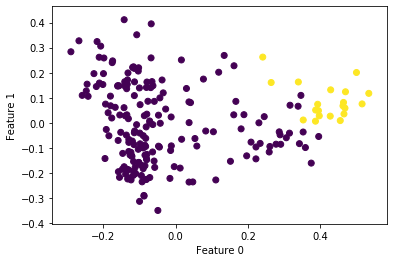

In [8]:
import matplotlib.pyplot as plt

clustering = DBSCAN(eps=0.5, min_samples=20, metric='cosine')
clusters = clustering.fit(tf_idf_array)
labels = clusters.labels_

sklearn_pca = PCA(n_components = 2)
data = sklearn_pca.fit_transform(tf_idf_array)

plt.scatter(data[:, 0], data[:, 1], c=clusters.labels_, cmap="viridis")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.savefig('dbscan_viergenres')

https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

In [77]:
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [84]:
#centers = [[1, 1], [-1, -1], [1, -1]]

tf_idf_vectorizor = TfidfVectorizer()
tf_idf = tf_idf_vectorizor.fit_transform(df.text)
tf_idf_norm = normalize(tf_idf)
dbscan_data = tf_idf_norm.toarray()
dbscan_data_scaler = StandardScaler().fit(dbscan_data)
X = dbscan_data_scaler.transform(dbscan_data)

#X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,random_state=0)

labels_true = df.sample(frac=0.05)
labels_true_vectorizor = TfidfVectorizer()
labels_true = labels_true_vectorizor.fit_transform(labels_true.text)
labels_true_norm = normalize(labels_true)
labels_true = labels_true_norm.toarray()

labels_true

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01652742, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [75]:
labels_true 

array([0, 1, 0, 2, 0, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 0, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 1,
       1, 1, 0, 2, 0, 1, 2, 2, 1, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 1, 2,
       1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 0, 2, 0, 2,
       2, 2, 0, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 1, 0, 2, 1, 1, 2,
       2, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 1,
       1, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1,
       1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1,
       2, 2, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1,
       1, 0, 0, 1, 1, 0, 0, 2, 1, 2, 2, 1, 1, 2, 1, 2, 0, 2, 2, 0, 1, 2,
       2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0,

In [76]:
labels_pred

NameError: name 'labels_pred' is not defined

In [85]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [86]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [87]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 0
Estimated number of noise points: 1038


ValueError: labels_true must be 1D: shape is (52, 8993)

https://towardsdatascience.com/dbscan-clustering-for-data-shapes-k-means-cant-handle-well-in-python-6be89af4e6ea

In [25]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [140]:
#scaler = StandardScaler()

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
labels_true = df.sample(frac=0.05)

tf_idf_vectorizor = TfidfVectorizer()
tf_idf = tf_idf_vectorizor.fit_transform(labels_true.text)
tf_idf = tf_idf.todense()
tf_idf_norm = normalize(tf_idf)
#tf_idf_array = tf_idf_norm.toarray()

#X_scaled = scaler.fit_transform(tf_idf_array)

#tf_idf_array = tf_idf.todense() # <-- This line was needed to resolve the isse

sklearn_pca = PCA(n_components = 2)
data= sklearn_pca.fit_transform(tf_idf_norm)


In [141]:
dbscan = DBSCAN(eps=0.2, min_samples = 5, metric="cosine")
clusters = dbscan.fit(data)

cores = dbscan.components_

Text(0, 0.5, 'Feature 1')

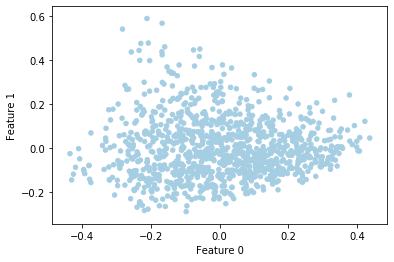

In [125]:
import matplotlib.pyplot as plt
core_mask = np.zeros_like(dbscan.labels_, dtype=bool)

plt.scatter(cores[:, 0], cores[:, 1], c=dbscan.labels_, marker='o', s=20, cmap="Paired")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [142]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

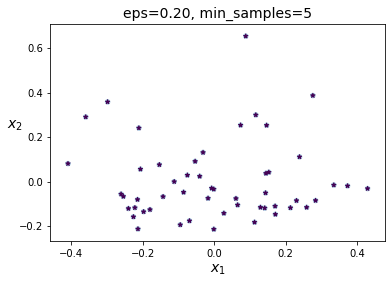

In [144]:
plot_dbscan(dbscan, tf_idf_norm, size=20)